<a href="https://colab.research.google.com/github/Gabriel-dev-bot/Emptech-2/blob/main/Assignment_9_1_Convolutional_Neural_Network_Pabilan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Pabilan, Gabriel

Course and Section: CPE019-CPE32S1

Date of Submission: 07/10/2024

Instructor: Engr. Roman Richard

##Explain your datasets and the problem being addressed.


In [ ]:
#import
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


169001437/169001437 [==============================] - 6s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


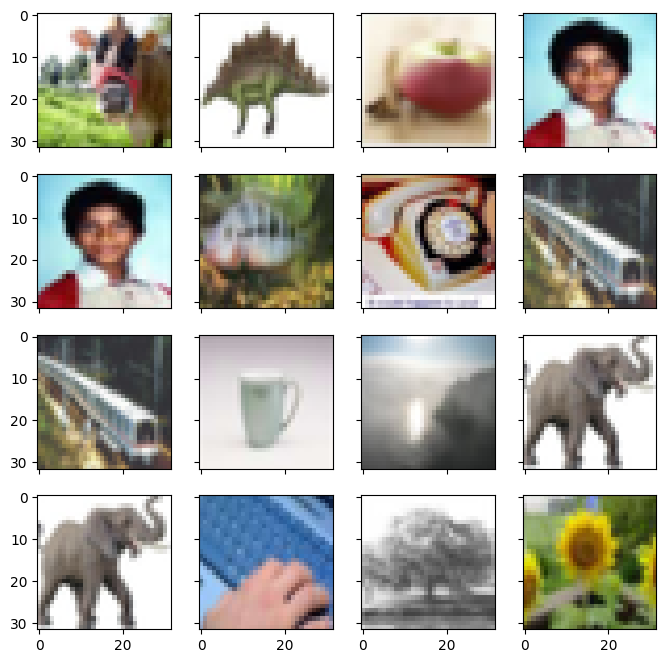

In [ ]:
# load dataset
(trainX, trainy), (testX, testy) = cifar100.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

# create a grid of 5x5 images
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8,8))
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap('Blues'))
# show the plot
plt.show()

##Using your dataset, create a baseline model of the CNN

> 29.780
> 30.810
> 32.180
> 31.180
> 30.630


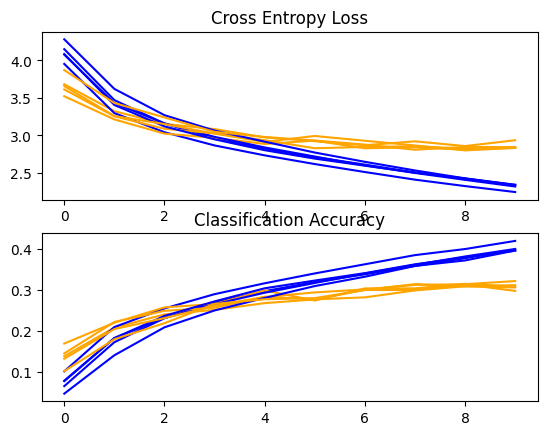

Accuracy: mean=30.916 std=0.781, n=5


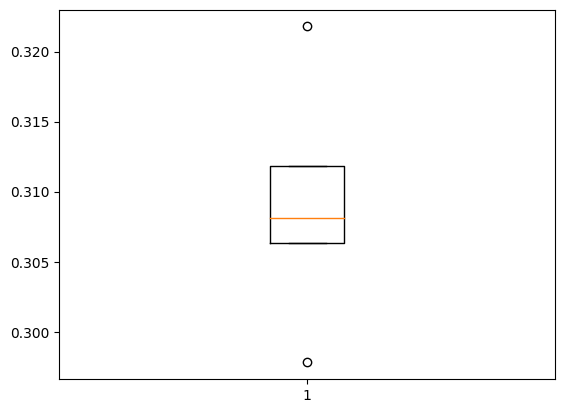

Total time taken: 1617.1016809940338 seconds


In [ ]:
import time
start_time = time.time()

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar100.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
	testX = testX.reshape((testX.shape[0], 32, 32, 3))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define model
def define_model():
  model = Sequential()
  model.add(Conv2D(30, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(120, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(100, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #optimizer = 'adam'
  return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()


end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")


> 31.090
> 29.390
> 31.940
> 30.830
> 33.050


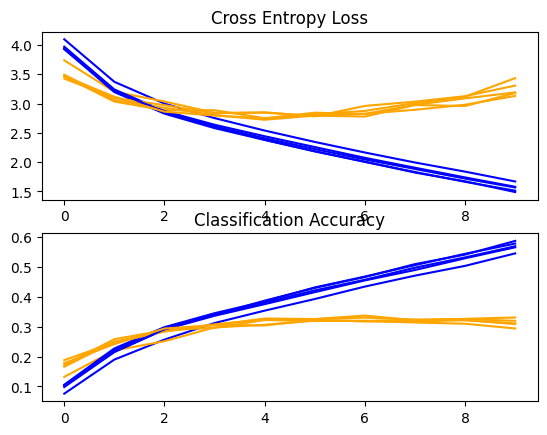

Accuracy: mean=31.260 std=1.215, n=5


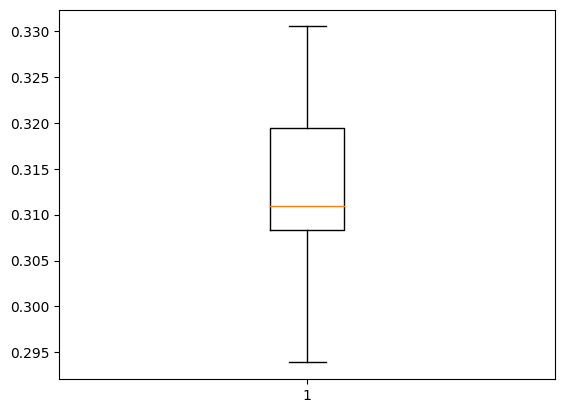

Total time taken: 4805.241690397263 seconds


In [ ]:
#improve model

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar100.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
	testX = testX.reshape((testX.shape[0], 32, 32, 3))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define model
def define_model():
	model = Sequential()
	model.add(Conv2D(30, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(62, (4, 4), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(120, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(100, activation='softmax'))

  # compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #optimizer = 'adam'
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

# entry point, run the test harness
run_test_harness()


end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time, "seconds")


### SAVE IMPROVED MODEL

In [ ]:
#save improved model
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar100.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
	testX = testX.reshape((testX.shape[0], 32, 32, 3))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define model
def define_model():
	model = Sequential()
	model.add(Conv2D(30, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(62, (4, 4), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(120, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(100, activation='softmax'))

  # compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #optimizer = 'adam'
	return model

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)
	# save model
	model.save('/content/drive/MyDrive/Colab Notebooks/Assignment_9.1/final_model.h5')

# entry point, run the test harness
import time
start_time = time.time()
run_test_harness()
end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time/60, "minutes")

Total time taken: 12.481815719604493 minutes


### Evaluate Model

In [ ]:
# evaluate the deep model on the test dataset
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt


# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar100.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
	testX = testX.reshape((testX.shape[0], 32, 32, 3))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('/content/drive/MyDrive/Colab Notebooks/Assignment_9.1/final_model.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_test_harness()

> 32.520


### Perform feature standardization

-1.8973318 0.46283296 2.0245721


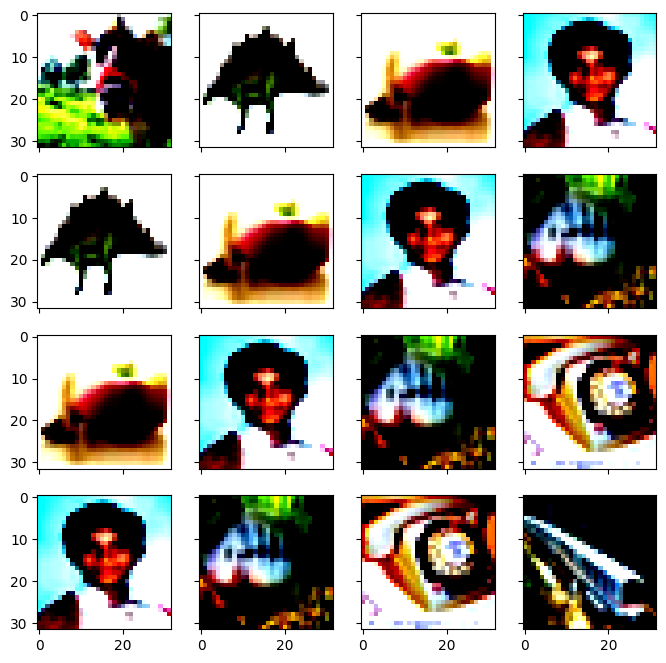

In [ ]:
# Standardize images across the dataset, mean=0, stdev=1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8,8))
    for i in range(4):
        for j in range(4):
            ax[i][j].imshow(X_batch[i*1+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break



-2.109864 0.46473122 2.6217933


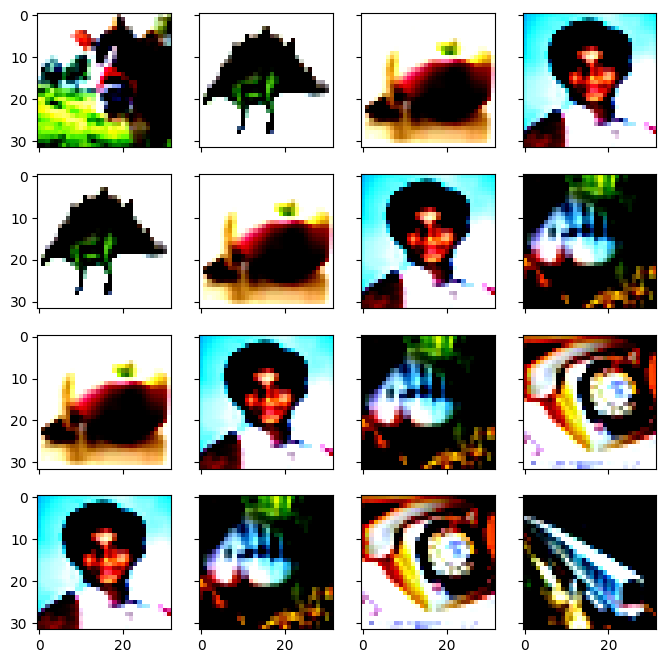

In [ ]:
# Standardize images across the dataset, every pixel has mean=0, stdev=1

# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.mean = X_train.mean(axis=0)
datagen.std = X_train.std(axis=0)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(8,8))
    for i in range(4):
        for j in range(4):
            ax[i][j].imshow(X_batch[i*1+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

Min: -2.1147616  Mean: 0.19362995  Max: 2.6217933


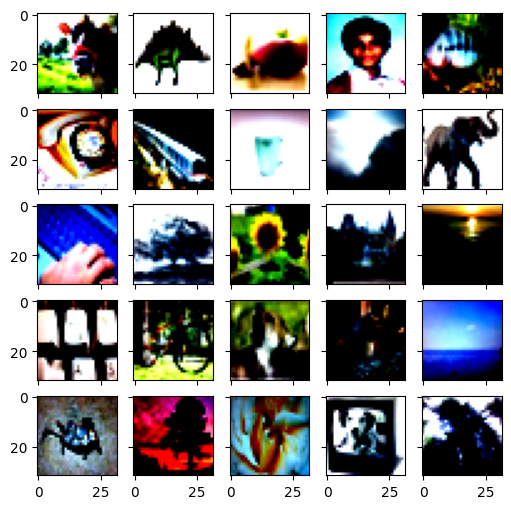

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(trainX, trainY), (testX, testY) = cifar100.load_data()

trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
testX = testX.reshape((testX.shape[0], 32, 32, 3))

trainX = trainX.astype('float32')

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

datagen.mean = trainX.mean(axis=0)
datagen.std = trainX.std(axis=0)

for X_batch, y_batch in datagen.flow(trainX, trainY, batch_size=25, shuffle=False):
    print('Min:', X_batch.min(), ' Mean:', X_batch.mean(), ' Max:', X_batch.max())

    fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(6,6))
    for i in range(5):
        for j in range(5):
            ax[i][j].imshow(X_batch[i*5+j], cmap=plt.get_cmap("gray"))
    plt.show()
    break

### Perform ZCA whitening of your images

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


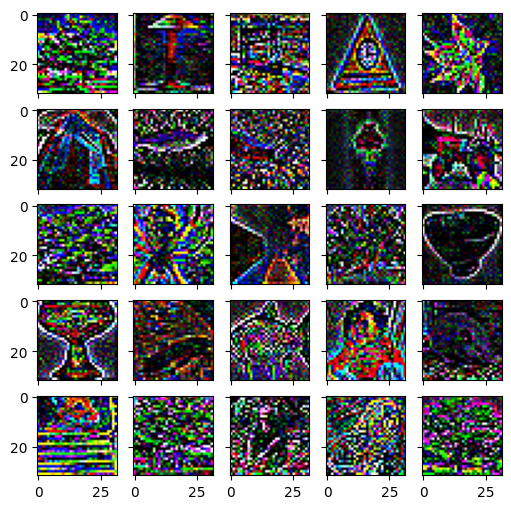

In [ ]:
# ZCA Whitening
import numpy as np
# load data
(trainX, trainY), (testX, testY) = cifar100.load_data()
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    zca_whitening=True
)
datagen.fit(trainX)

batchX, batchY = next(datagen.flow(trainX, trainY, batch_size=32))

fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(6, 6))
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(batchX[i*5+j], cmap=plt.get_cmap("gray"))
plt.show()

-14.675043 0.015575557 9.333309


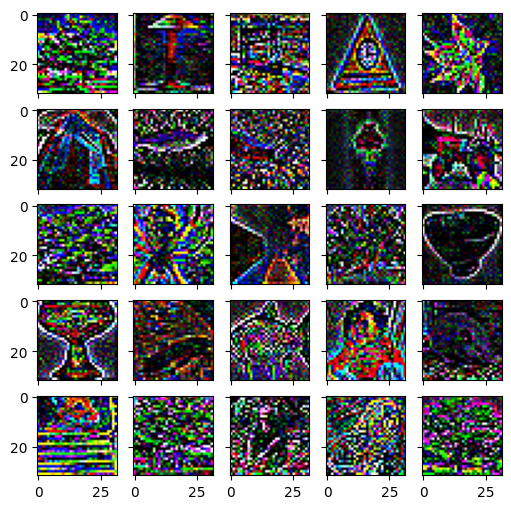

In [ ]:
# ZCA Whitening

# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True)
# fit parameters from data
X_mean = X_train.mean(axis=0)
datagen.fit(X_train - X_mean)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train - X_mean, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(6, 6))
    for i in range(5):
      for j in range(5):
        ax[i][j].imshow(batchX[i*5+j])
    plt.show()
    break

### Predicting Images

1/1 [==============================] - 0s 415ms/step


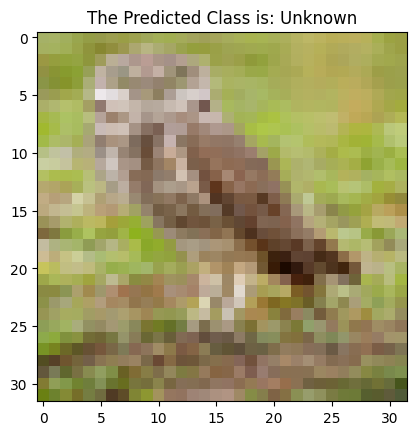

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the Fashion MNIST dataset
(_, _), (test_images, _) = cifar100.load_data()

# Normalize the pixel values to be between 0 and 1
test_images = test_images / 255.0

# Define the class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Load the best trained model
best_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Assignment_9.1/final_model.h5')

# Load and resize the example image (assuming it's already in RGB format)
example_image = Image.open('/content/drive/MyDrive/Colab Notebooks/Assignment_9.1/Owl.png')
example_image = example_image.resize((32, 32))
example_image = np.array(example_image) / 255.0  # Normalize pixel values to [0, 1]

# Ensure the image has three channels (RGB)
if example_image.shape[-1] == 1:
    example_image = np.stack([example_image[:, :, 0]] * 3, axis=-1)  # Convert single-channel to RGB

# Expand dimensions to add batch dimension
example_image = np.expand_dims(example_image, axis=0)

# Make a prediction on the example image
prediction = best_model.predict(example_image)

# Extract predicted class index
predicted_class_index = np.argmax(prediction)

# Verify the predicted class index is within the range of class names
if 0 <= predicted_class_index < len(class_names):
    predicted_class = class_names[predicted_class_index]
else:
    predicted_class = "Unknown"  # Assign a default value if index is out of range

# Display the image and the predicted class
plt.imshow(example_image[0])
plt.title(f"The Predicted Class is: {predicted_class}")
plt.show()


###Augment data with random rotations, shifts, and flips

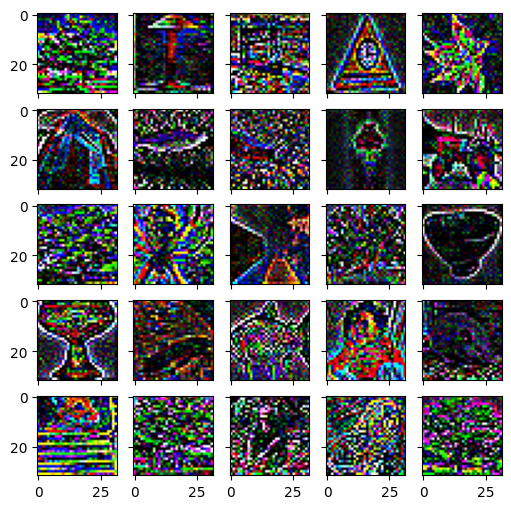

In [ ]:
# Random Rotations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(6, 6))
    for i in range(5):
      for j in range(5):
        ax[i][j].imshow(batchX[i*5+j], cmap=plt.get_cmap("gray"))
    plt.show()
    break

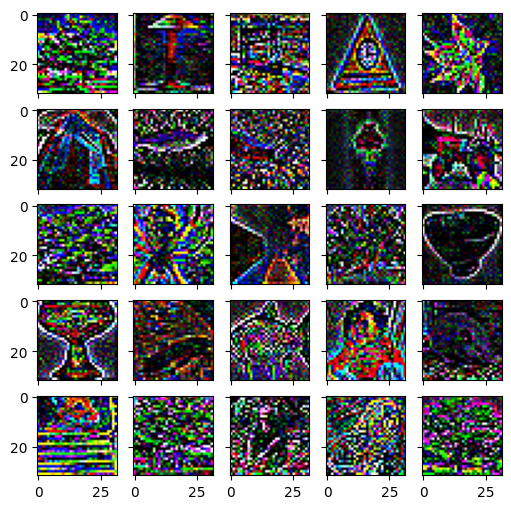

In [ ]:
# Random Shifts

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(6, 6))
    for i in range(5):
      for j in range(5):
        ax[i][j].imshow(batchX[i*5+j], cmap=plt.get_cmap("gray"))
    plt.show()
    break

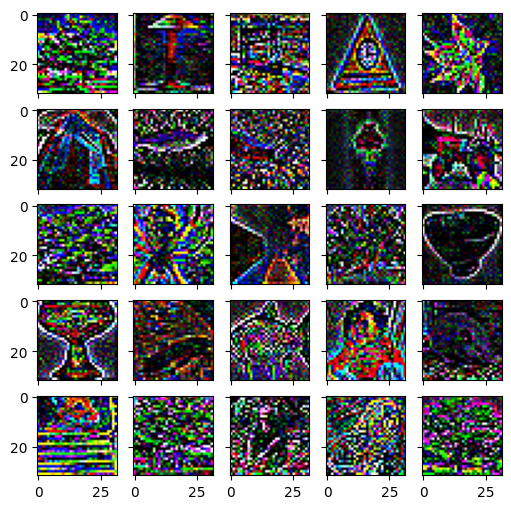

In [ ]:
# Random Flips
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(6, 6))
    for i in range(5):
      for j in range(5):
        ax[i][j].imshow(batchX[i*5+j], cmap=plt.get_cmap("gray"))
    plt.show()
    break

###Save augmented image data to disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /gdrive

Mounted at /content/drive
/gdrive


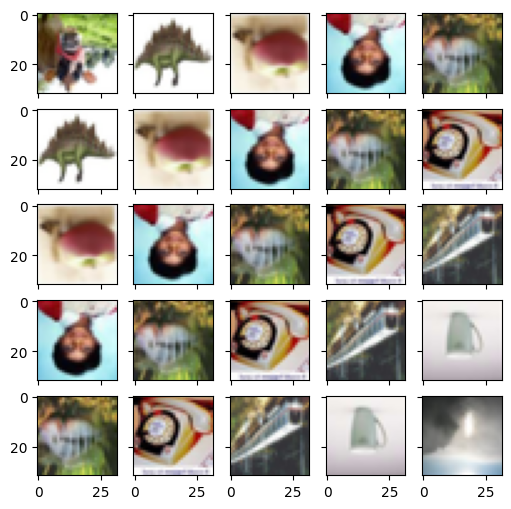

In [ ]:
(trainX, trainY), (testX, testY) = cifar100.load_data()
trainX = trainX.astype('float32')
testX = testX.astype('float32')
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
for X_batch, y_batch in datagen.flow(trainX, trainY, batch_size=9, shuffle=False,
                                     save_to_dir='/content/drive/MyDrive/Colab Notebooks/Assignment_9.1', save_prefix='aug', save_format='png'):
    fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(6,6))
    for i in range(5):
        for j in range(5):
            ax[i][j].imshow(X_batch[i*1+j]/255, cmap=plt.get_cmap("gray"))
    plt.show()
    break

###Develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task

In [ ]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=10, validation_data=(testX, testY), verbose=0)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

def summarize_diagnostics(histories):
	for i in range(len(histories)):
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='black', label='train')
		plt.plot(histories[i].history['val_loss'], color='blue', label='test')
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='black', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='blue', label='test')
	plt.show()

###Explore extensions to a baseline model to improve learning and model capacity.

In [ ]:
def load_dataset():
    (trainX, trainY), (testX, testY) = cifar100.load_data()
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_ix, test_ix in kfold.split(dataX):
        model = define_model()
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        scores.append(acc)
        histories.append(history)
    return scores, histories

def summarize_diagnostics(histories):
    for i in range(len(histories)):
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='green', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')

        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='green', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()


def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    plt.boxplot(scores)
    plt.show()


def run_test_harness():
    trainX, trainY, testX, testY = load_dataset()
    trainX, testX = prep_pixels(trainX, testX)
    scores, histories = evaluate_model(trainX, trainY)
    summarize_diagnostics(histories)

# Measure the execution time
import time
start_time = time.time()
end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time/60, "minutes")

Total time taken: 6.278355916341146e-07 minutes


###Develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.

In [ ]:
import time
start_time = time.time()

from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar100.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 32, 32, 3))
	testX = testX.reshape((testX.shape[0], 32, 32, 3))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_image(filename):
    img = load_img(filename, target_size=(32, 32))  # Load the image in RGB format
    img = img_to_array(img)  # Convert image to numpy array
    img = img.reshape(1, 32, 32, 3)  # Reshape image to match model input shape (add color channel)
    img = preprocess_input(img)  # Preprocess the image for the VGG16 model (optional)
    return img

def run_example():
    filename = '/content/drive/MyDrive/Colab Notebooks/Assignment_9.1/aug_4_8083.png'
    img = load_image(filename)
    model = load_model('/content/drive/MyDrive/Colab Notebooks/Assignment_9.1/final_model.h5')
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)

run_example()


1/1 [==============================] - 0s 84ms/step
62


# Conclusion <br>
Developing and evaluating an image classification model involves several key steps. Data prep, model training, and performance checks make up the core process. A well-chosen dataset can boost the model's accuracy and power. We can level up our dataset's quality through clever tricks like image tweaking, feature balancing, and ZCA whitening. This pumps up our model's muscle. But here's the kicker - we need a rock-solid test setup. It's crucial for getting a true read on how well our model's doing. Plus, it gives us a starting point to measure future upgrades against. Without it, we're flying blind.
Boosting the baseline model's power can spark big gains in what it grasps and picks up. Tricks like transfer learning teaming up models, and tweaking settings can make it spot things better and work well on new stuff. , putting the final model through its paces and seeing how it handles fresh pics sheds light on what it nails and where it stumbles. This points to spots ripe for a tune-up. In a nutshell, crafting and sizing up an image sorting model is a back-and-forth dance. You tinker, you test, you polish - all while keeping a sharp eye on your data how you've built the thing, and how you're keeping score.





